In [2]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt

def calculate_rpm(audio_file, plot=False):
    # 1. Load audio
    y, sr = librosa.load(audio_file, sr=None)

    # Mono
    if y.ndim > 1:
        y = np.mean(y, axis=1)

    # 2. Bandpass filter (0.1 Hz to 2 Hz) typical respiration frequency
    nyquist = 0.5 * sr
    low = 0.1 / nyquist
    high = 2.0 / nyquist
    b, a = signal.butter(2, [low, high], btype='band')
    y_filtered = signal.filtfilt(b, a, y)

    # 3. Compute envelope to detect peaks
    envelope = np.abs(signal.hilbert(y_filtered))

    # 4. Find peaks (each peak ~ one breath)
    peaks, _ = signal.find_peaks(envelope, distance=sr*0.5)  # min 0.5s between breaths

    # 5. Calculate RPM
    duration_min = len(y) / sr / 60.0
    num_breaths = len(peaks)
    rpm = num_breaths / duration_min

    if plot:
        t = np.arange(len(y)) / sr
        plt.figure(figsize=(12,4))
        plt.plot(t, y, label='Raw signal')
        plt.plot(t, y_filtered, label='Filtered (0.1-2 Hz)')
        plt.plot(t, envelope, label='Envelope', alpha=0.7)
        plt.plot(peaks/sr, envelope[peaks], 'rx', label='Detected breaths')
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Estimated RPM: {rpm:.2f}")
        plt.legend()
        plt.show()

    print(f"Detected breaths: {num_breaths}")
    print(f"Estimated RPM (respirations per minute): {rpm:.2f}")
    return rpm, num_breaths


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


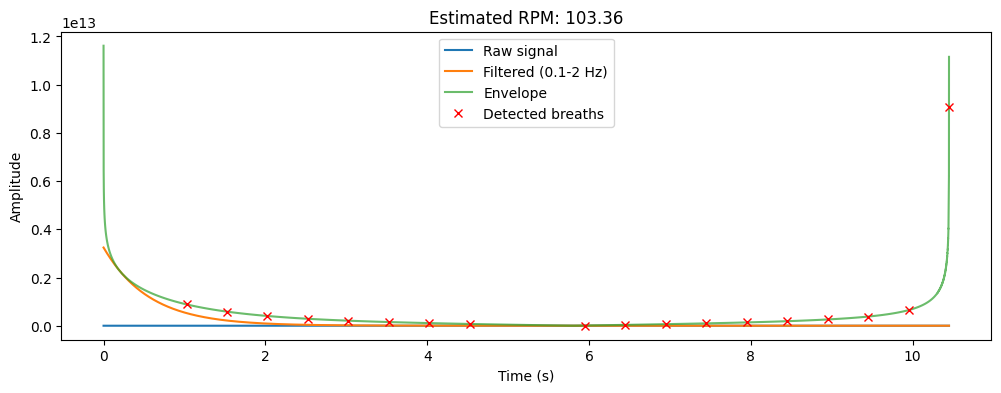

Detected breaths: 18
Estimated RPM (respirations per minute): 103.36


In [3]:
rpm, breaths = calculate_rpm("asthma_audio.mp3", plot=True)